# frames Extraction

In [2]:

import os
import subprocess
import cv2
import time


# dataset = os.listdir('E:/li8_videos/light_videos')
dataset = os.listdir('E:/all_videos/')
output_loc='E:/li8_videos/frames_400/'

for ttv in dataset:
    filename='E:/all_videos/'+ttv
    print(filename)
    name=output_loc+ttv
    try:    
        os.mkdir(name)
    except OSError:
             pass
    # Log the time
    time_start = time.time()
    # Start capturing the feed
    cap = cv2.VideoCapture(filename)
    # Find the number of frames
#     video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))-290
    video_length=15
    print ("Number of frames: ", video_length)
    count = 0
    print ("Converting video..\n")
    while cap.isOpened():
        # Extract the frame
        ret, frame = cap.read()
        if not ret:
            continue
        print("name :", name)
        cv2.imwrite(name+'/'+'_'+str(count+1)+".jpg" , frame)
        count = count + 1
        # If there are no more frames left
        if (count > (video_length-1)):
            # Log the time again
            time_end = time.time()
            # Release the feed
            cap.release()
            # Print stats
            print ("Done extracting frames.\n%d frames extracted" % count)
            print ("It took %d seconds forconversion." % (time_end-time_start))
            break

    



E:/all_videos/.fuse_hidden00000e62000002a8
Number of frames:  15
Converting video..

E:/all_videos/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
Number of frames:  15
Converting video..

name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4
name : E:/li8_videos/frames_400/00e378e79252ea61fd95cfb807d8126085efdc34897db84be58

(10, 180, 180, 3)


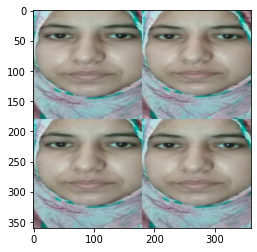

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

images = []
inputImages = []
outputImage = np.zeros((360, 360, 3), dtype="uint8")
# loop over the input house paths
dirpath=os.listdir('E:/li8_videos/frames/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4/')
for iname in dirpath:
    filename='E:/li8_videos/frames/00e378e79252ea61fd95cfb807d8126085efdc34897db84be580b893ba6033e1.mp4/'+iname 
    # load the input image, resize it to be 32 32, and then
    # update the list of input images
    image = cv2.imread( filename)
    image = cv2.resize(image, (180, 180))
    inputImages.append(image)
print(np.shape(inputImages))
outputImage[0:180, 0:180] = inputImages[0]
outputImage[0:180, 180:360] = inputImages[1]
outputImage[180:360, 180:360] = inputImages[2]
outputImage[180:360, 0:180] = inputImages[3]
images.append(outputImage)
images=np.reshape(images,(360,360,3))
imgplot = plt.imshow(cv2.cvtColor(images,cv2.COLOR_BGR2RGB))
plt.show()

# contrast_enhancement

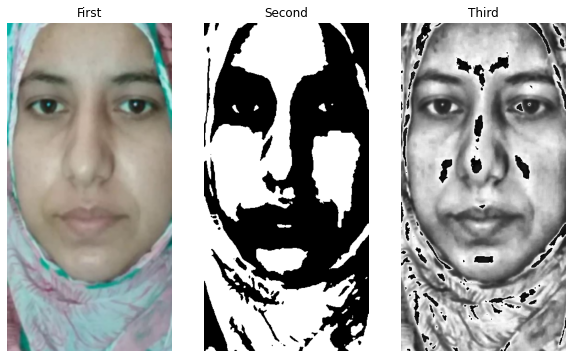

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
# Reading the image from the present directory

image = cv2.imread("E:\\_14.jpg")
# Resizing the image for compatibility
image = cv2.resize(image, (300, 600))
# The initial processing of the image
image = cv2.medianBlur(image, 3)
image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit = 5)
final_img = clahe.apply(image_bw) + 30

# Ordinary thresholding the same image
_, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

  

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 3
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("First")
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(cv2.cvtColor(ordinary_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB) )
plt.axis('off')
plt.title("Third")

plt.show()

In [ ]:
import scipy
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np
def image_sharp(img):
    f=img
    blurred_f = ndimage.gaussian_filter(f, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 30
    sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)
    img=sharpened
    #plt.figure(figsize=(12, 4))
    #plt.subplot(131)
    #plt.imshow(f, cmap=plt.cm.gray)
    #plt.axis('off')
    #plt.subplot(132)
    #plt.imshow(blurred_f, cmap=plt.cm.gray)
    #plt.axis('off')
    #plt.subplot(133)
    #plt.imshow(sharpened,cmap=plt.cm.gray)
    #plt.axis('off')
    #plt.tight_layout()
    #plt.show()
    return img

# Training 

In [15]:
import numpy as np
df=pd.read_csv('E:\\final_df_423.csv')
newdf = pd.DataFrame(np.repeat(df.values, 15, axis=0))
newdf.columns = df.columns
print(newdf)
newdf.to_csv(r'E:\\li8_videos\\labels.csv')

                                             Video File              Date  \
0     5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9...  21/05/2022 13:15   
1     5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9...  21/05/2022 13:15   
2     5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9...  21/05/2022 13:15   
3     5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9...  21/05/2022 13:15   
4     5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9...  21/05/2022 13:15   
...                                                 ...               ...   
6355                                              1.mp4  27/07/2022 10:53   
6356                                              1.mp4  27/07/2022 10:53   
6357                                              1.mp4  27/07/2022 10:53   
6358                                              1.mp4  27/07/2022 10:53   
6359                                              1.mp4  27/07/2022 10:53   

         BP Sugar Temprature Pulse Oxygen   
0      9267   NaN      101.0  

In [1]:
import warnings
import os
import subprocess
import cv2
import time
import pandas as pd 
import glob
import numpy as np
directory='E:\\li8_videos\\frames_400\\'
df=pd.read_csv('E:/li8_videos/labels.csv')
cv_img = []
dataset = os.listdir('E:\\li8_videos\\frames_400\\')
for i in range(424):
    for ttv in dataset:
        filename='E:\\li8_videos\\frames_400\\'+ttv
        name=df["Video File"]
        name_value=name.values[i]
        path='E:\\li8_videos\\frames_400\\'+ ttv
        if name_value==ttv:   
            for img in glob.glob(path+"\\*.jpg"):
                print(img)
                n= cv2.imread(img)
                m = cv2.resize(n, (256, 256))
                n=np.reshape(m,(256, 256,3))
                print(np.shape(n))
                image=np.array(n)
                cv_img.append(image)
        else:
            continue


E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_1.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_10.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_11.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_12.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_13.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_14.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_15.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c98582d8620c4f19d566.mp4\_2.jpg
(256, 256, 3)
E:\li8_videos\frames_400\5ff23dbff14a7a996d53f09956e2ced1a6221fc3f167c9858

In [2]:
x_train=np.expand_dims(cv_img, axis=1).reshape((-1, 256,256, 3))
print('X_data shape:', np.shape(x_train))
df=pd.read_csv('E:/li8_videos/labels.csv')
y_train=df["Pulse"]
print(np.shape(y_train))
# g=np.expand_dims(cv_img, axis=1).reshape((-1, 640,360, 3))
# print('X_data shape:', np.shape(g))

X_data shape: (6360, 256, 256, 3)
(6360,)


In [3]:
def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
# initialize the input shape and channel dimension, assuming
# TensorFlow/channels-last ordering
    inputShape = (width,height,depth)
    chanDim = -1
    inputs = Input(shape=inputShape)
    for (i, f) in enumerate(filters):
        if i == 0:
            x = inputs
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2, 2))(x)
        x = Flatten()(x)
        x = Dense(16)(x)
        x = Activation("relu")(x)
        x = BatchNormalization(axis=chanDim)(x)
        x = Dropout(0.5)(x)
        # apply another FC layer, this one to match the number of nodes
        # coming out of the MLP
        x = Dense(4)(x)
        x = Activation("relu")(x)
        # check to see if the regression node should be added
        if regress:
            x = Dense(1, activation="linear")(x)
        # construct the CNN
        model = Model(inputs, x)
        # return the CNN
        return model

In [ ]:
import sklearn
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.layers import InputLayer,Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
import numpy as np
import locale
import os

split = train_test_split(y_train, x_train, test_size=0.20, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split
maxPrice = trainAttrX.max()
trainY = trainAttrX / maxPrice
testY = testAttrX / maxPrice
model = create_cnn(256, 256, 3, regress=True)
opt = Adam(lr=1e-3, decay=1e-3 / 200)
model.compile(loss="mean_absolute_percentage_error", optimizer=opt, metrics=['mse'])
# train the model
print("[INFO] training model...")
model.fit(x=trainImagesX, y=trainY, 
    validation_data=(testImagesX, testY),
    epochs=200, batch_size=8)


[INFO] training model...
Epoch 1/200
636/636 [==============================] - 81s 127ms/step - loss: 43.7234 - mse: 0.0961 - val_loss: 16.6285 - val_mse: 0.0096
Epoch 2/200
636/636 [==============================] - 79s 124ms/step - loss: 18.1614 - mse: 0.0120 - val_loss: 16.8616 - val_mse: 0.0104
Epoch 3/200
636/636 [==============================] - 81s 127ms/step - loss: 15.7856 - mse: 0.0089 - val_loss: 18.6670 - val_mse: 0.0165
Epoch 4/200
636/636 [==============================] - 79s 124ms/step - loss: 15.4178 - mse: 0.0084 - val_loss: 15.2890 - val_mse: 0.0079
Epoch 5/200
636/636 [==============================] - 79s 124ms/step - loss: 15.4081 - mse: 0.0083 - val_loss: 15.2901 - val_mse: 0.0077
Epoch 6/200
636/636 [==============================] - 80s 125ms/step - loss: 15.3400 - mse: 0.0083 - val_loss: 15.1298 - val_mse: 0.0076
Epoch 7/200
636/636 [==============================] - 98s 154ms/step - loss: 15.3010 - mse: 0.0082 - val_loss: 15.3051 - val_mse: 0.0078
Epoch 8/2

In [ ]:
print("[INFO] predicting house prices...")
preds = model.predict(testImagesX)
diff = preds.flatten() - testY
percentDiff = (diff / testY) * 100
absPercentDiff = np.abs(percentDiff)
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. pulse: {}, std pulse: {}".format(
locale.currency(df["Pulse"].mean(), grouping=True),
locale.currency(df["Pulse"].std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))